# Predicción de rendimientos de empresas tecnologicas

Nuestro proyecto consiste en realizar predicciones sobre 4 empresas tecnologicas, las cuales son: Microsoft, Sony, Nintendo y EA.


Mediante codigos y graficas realizaremos nuestras predicciones las cuales nos ayudaran a saber las probabilidades que hay de que suba o baje la acción de cada empresa, todo esto con el fin de saber si debemos comprar o vender y poder realizar una buena inversión.

# Objetivos

## Objetivo general

- Realizar las predicciones de las acciones de las distintas empresas selccionadas sobre la rama de la tecnologia

## Objetivos especificos

- Realizar la prediccón de las acciones de la empresa Microsoft y analizar si debemos comprar o vender
- Realizar la predicción de las acciones de la empresa Sony y analizar si debemos comprar o vender
- Realizar la predicción de las acciones de la empresa Nintendo y analizar si debemos comprar o vender
- Realizar la predicción de las acciones de la empresa EA y analizar si debemos comprar o vender

In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd

Se importaron las librerías pandas_datareader.data para importar los datos de las acciones de las empresas que se van a estar utilizando, librería matplotlib.pyplot para graficar, librería random, numpy y pandas para las tablas.

In [2]:
def get_closes(names, start_date, end_date):
    closes = web.DataReader(name=names,
                           data_source="yahoo",
                           start=start_date,
                           end=end_date)
    return closes['Adj Close']

Se define función get_closes para importar los los ajustes de cierre de las 4 empresas de videojuegos que elegimos que son Microsoft, Sony, Nintendo y EA.

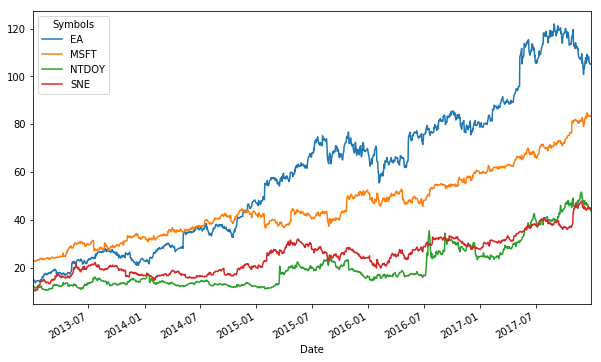

In [3]:
names = ['MSFT','SNE','NTDOY','EA']
start, end = '2013-01-01', '2017-12-31'
closes = get_closes(names=names, start_date=start, end_date=end)
closes.plot(figsize=(10,6));

Se grafican los datos de dichas empresas desde el primero de enero del 2013 hasta el 31 de diciembre del 2017.

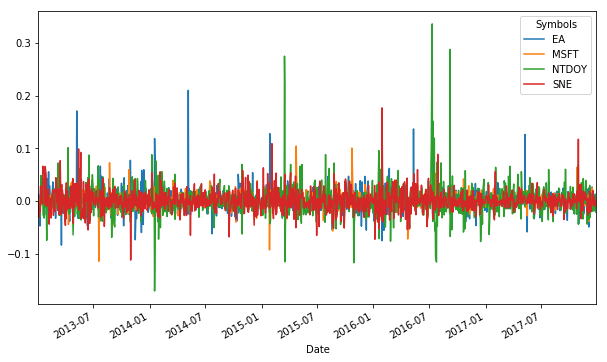

In [4]:
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

Gráfica de los rendimientos de cada empresa.

Para calcular los rendimientos que habrá en un futuro se hace por medio de la fórmula de densidad de la distribución normal que es:


$$\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Donde $\sigma$ es la desviación estándar, $\mu$ es la media muestral y $x$ es nuestra variable. Se usarán 4 $\sigma$ y 4 $\mu$ diferentes, cada una con su respectiva compañía.

In [5]:
mu_M, mu_S,mu_N,mu_E = ret.mean()["MSFT"], ret.mean()["SNE"], ret.mean()["NTDOY"], ret.mean()["EA"]
mu_M, mu_S,mu_N,mu_E

(0.0011037456489377726,
 0.0013177970791718688,
 0.0014091069565823882,
 0.0017690892719742707)

Se calcula la media de los datos obtenidos de cada empresa.

In [6]:
s_M, s_S,s_N,s_E = ret.std()["MSFT"], ret.std()["SNE"], ret.std()["NTDOY"], ret.std()["EA"]
s_M, s_S,s_N,s_E

(0.014082221268490635,
 0.02038058175423343,
 0.02953146819526424,
 0.0200668955824745)

Se calcula la sigma de cada empresa.

In [7]:
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

Se define la función ret_sim que nos sirve para simular escenarios de rendimientos obtenidos de las empresas.

In [8]:
simret_M = ret_sim(mu_M, s_M, 365, 1000, '2018-01-01')
simret_S = ret_sim(mu_S, s_S, 365, 1000, '2018-01-01')
simret_N = ret_sim(mu_N, s_N, 365, 1000, '2018-01-01')
simret_E = ret_sim(mu_E, s_E, 365, 1000, '2018-01-01')

Se obtienen 1000 escenarios de simulaciones de las empresas en el
plazo de 1 año.

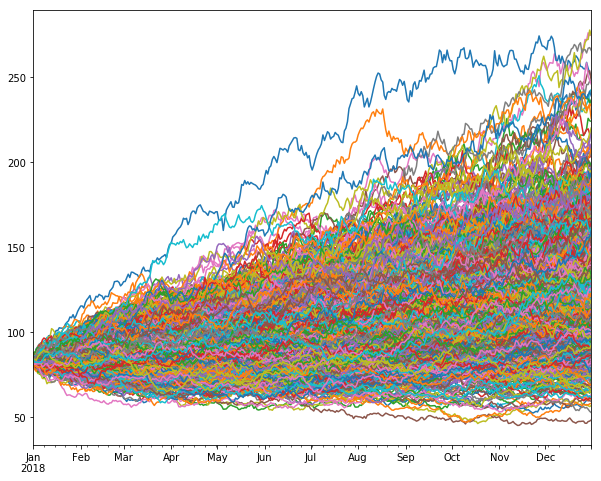

In [9]:
simcloses_M = closes.iloc[-1].MSFT*((1+simret_M).cumprod())
simcloses_S = closes.iloc[-1].SNE*((1+simret_S).cumprod())
simcloses_N = closes.iloc[-1].NTDOY*((1+simret_N).cumprod())
simcloses_E = closes.iloc[-1].EA*((1+simret_E).cumprod())
simcloses_M.plot(figsize=(10,8),legend=False);

Se grafica la simulación de 1000 escenarios para la empresa de Microsoft.

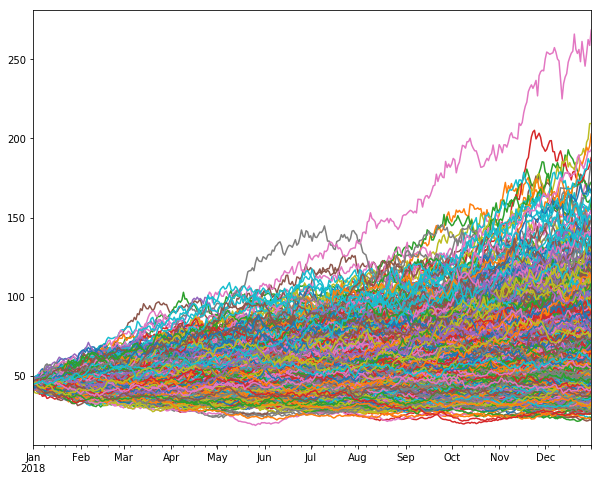

In [10]:
simcloses_S.plot(figsize=(10,8),legend=False);

Se grafica la simulación de 1000 escenarios para la empresa de Sony.

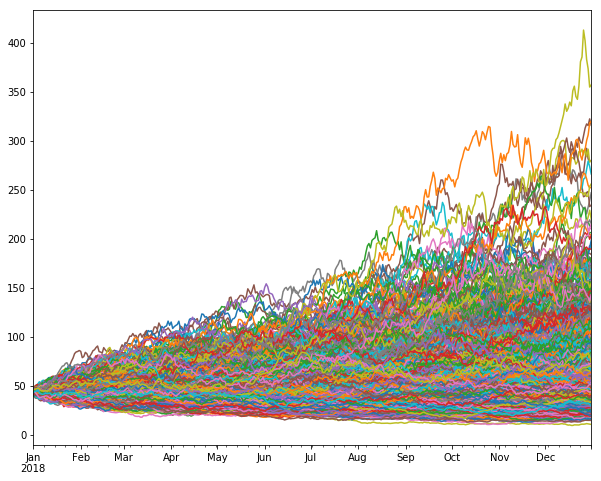

In [11]:
simcloses_N.plot(figsize=(10,8),legend=False);

Se grafica la simulación de 1000 escenarios para la empresa de Nintendo.

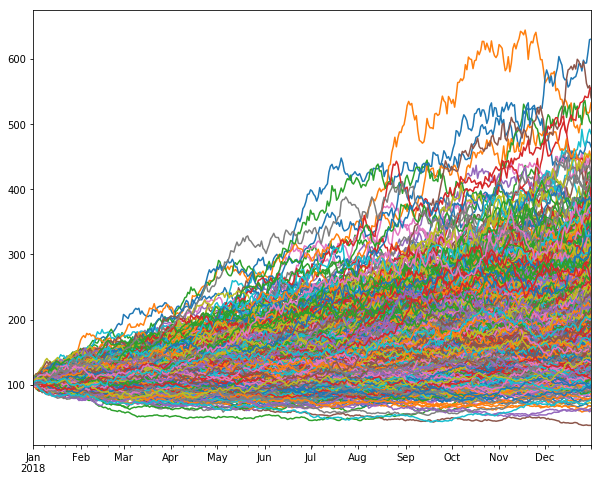

In [12]:
simcloses_E.plot(figsize=(10,8),legend=False);

Se grafica la simulación de 1000 escenarios para la empresa de EA.

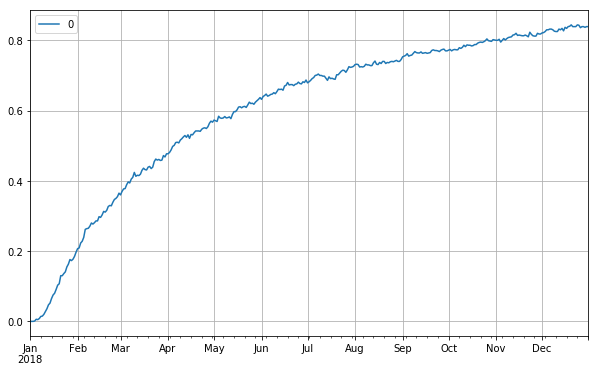

In [13]:
K_M = (1+0.10)*closes.iloc[-1].MSFT
prob = pd.DataFrame((simcloses_M>K_M).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

Gráfica de probabilidad de Microsoft a una tasa de interés anual del 10%.

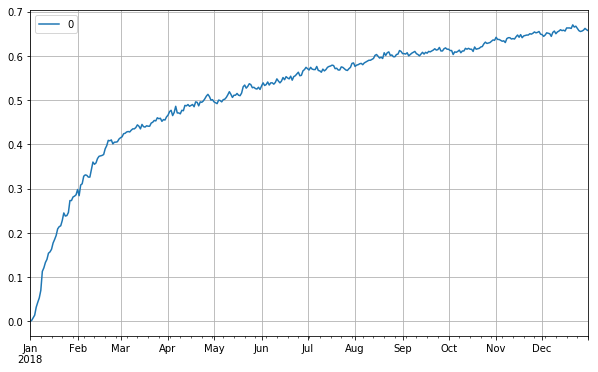

In [18]:
K_N = (1+0.10)*closes.iloc[-1].SNE
prob = pd.DataFrame((simcloses_N>K_N).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

Gráfica de probabilidad de Sony a una tasa de interés anual del 10%.

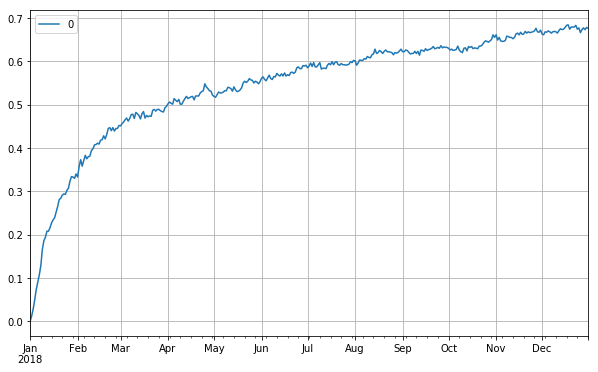

In [19]:
K_N = (1+0.10)*closes.iloc[-1].NTDOY
prob = pd.DataFrame((simcloses_N>K_N).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

Gráfica de probabilidad de Nintendo a una tasa de interés anual del 10%.

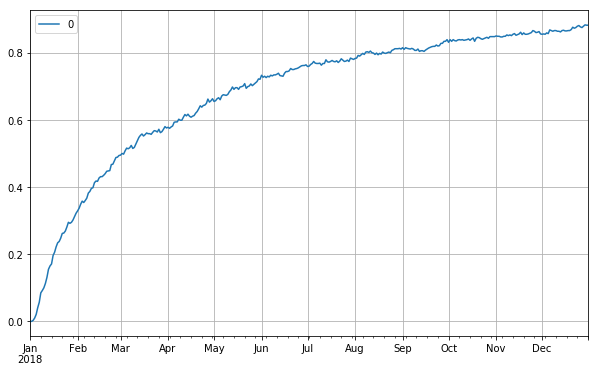

In [20]:
K_E = (1+0.10)*closes.iloc[-1].EA
prob = pd.DataFrame((simcloses_E>K_E).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

Gráfica de probabilidad de EA a una tasa de interés anual del 10%.

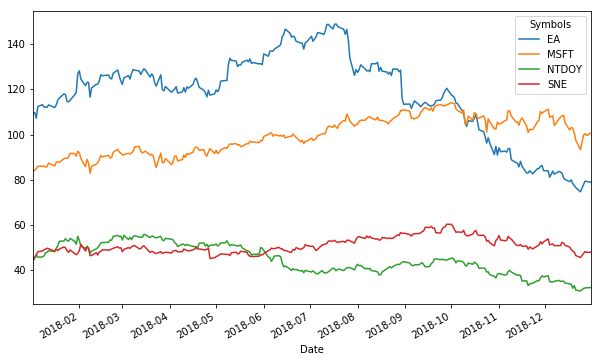

In [21]:
names = ['MSFT','SNE','NTDOY','EA']
start, end = '2018-01-01', '2018-12-31'
closes = get_closes(names=names, start_date=start, end_date=end)
closes.plot(figsize=(10,6));

En esta gráfica se muestran los datos reales del año 2018 de cada empresa.

## Referencias

Yahoo Finance. (N/A). Microsoft . (MSFT). Julio 10, 2019, de Yahoo Finance Sitio web: https://finance.yahoo.com/

Yahoo Finance. (N/A). Sony. (SNE). Julio 10, 2019, de Yahoo Finance Sitio web: https://finance.yahoo.com/

Yahoo Finance. (N/A). Nintendo. (NTDOY). Julio 10, 2019, de Yahoo Finance Sitio web: https://finance.yahoo.com/

Yahoo Finance. (N/A). EA. (EA). Julio 10, 2019, de Yahoo Finance Sitio web: https://finance.yahoo.com/